In [1]:
from IPython.display import Image

# 7장. 써포트 백터머신

## 7.2 선형 써포트 백터머신

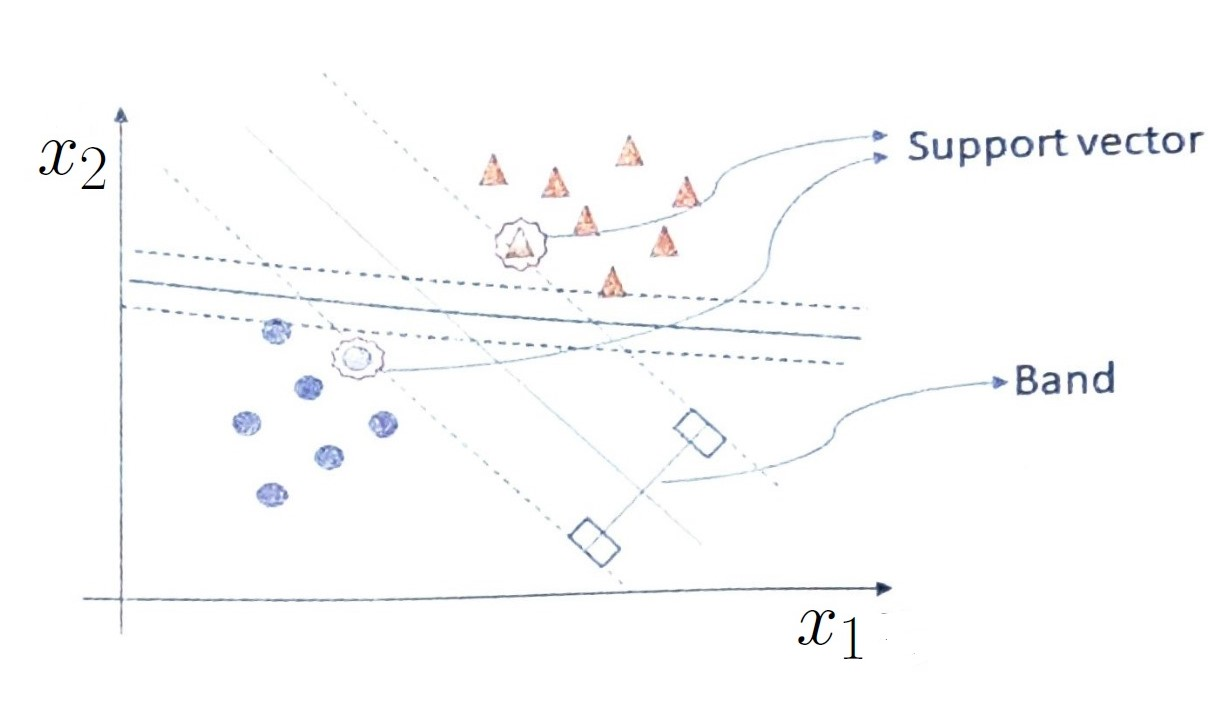

In [2]:
Image('./figs/ch07_1.jpg', width=500)

* 경마진 분류(hard-margin classification)

\begin{align*}
 f(\mathbf{x}) &= \beta_0 +\boldsymbol{\beta}^T\mathbf{x}, \;\;\text{분류선} \\ 
 &\Downarrow\\ 
 \beta_0 +\boldsymbol{\beta}^T\mathbf{x}_i&\geq 1, \;\;\text{when } y_i=1 \\ 
 \beta_0 +\boldsymbol{\beta}^T\mathbf{x}_i&\leq -1, \;\;\text{when } y_i=-1 \\ 
 &\Downarrow \;\text{on support vector}\\ 
 \beta_0 +\boldsymbol{\beta}^T\mathbf{x}_+&= 1 \\
 \beta_0 +\boldsymbol{\beta}^T\mathbf{x}_-&= -1 \\
 &\Downarrow \\
 \frac{\boldsymbol{\beta}^T}{\left \|  \boldsymbol{\beta} \right \|}\left(\mathbf{x}_+ -\mathbf{x}_- \right)&=\frac{2}{\left \|  \boldsymbol{\beta} \right \|} \\
 &\Downarrow \\
 y_i \left( \beta_0 +\boldsymbol{\beta}^T\mathbf{x}_i \right ) &\geq 1 \;\text{인 조건 하에서 } \frac{1}{2}\left \| \boldsymbol{\beta} \right \|^2 \text{를 최소화하는 } \boldsymbol{\beta} 
\end{align*}

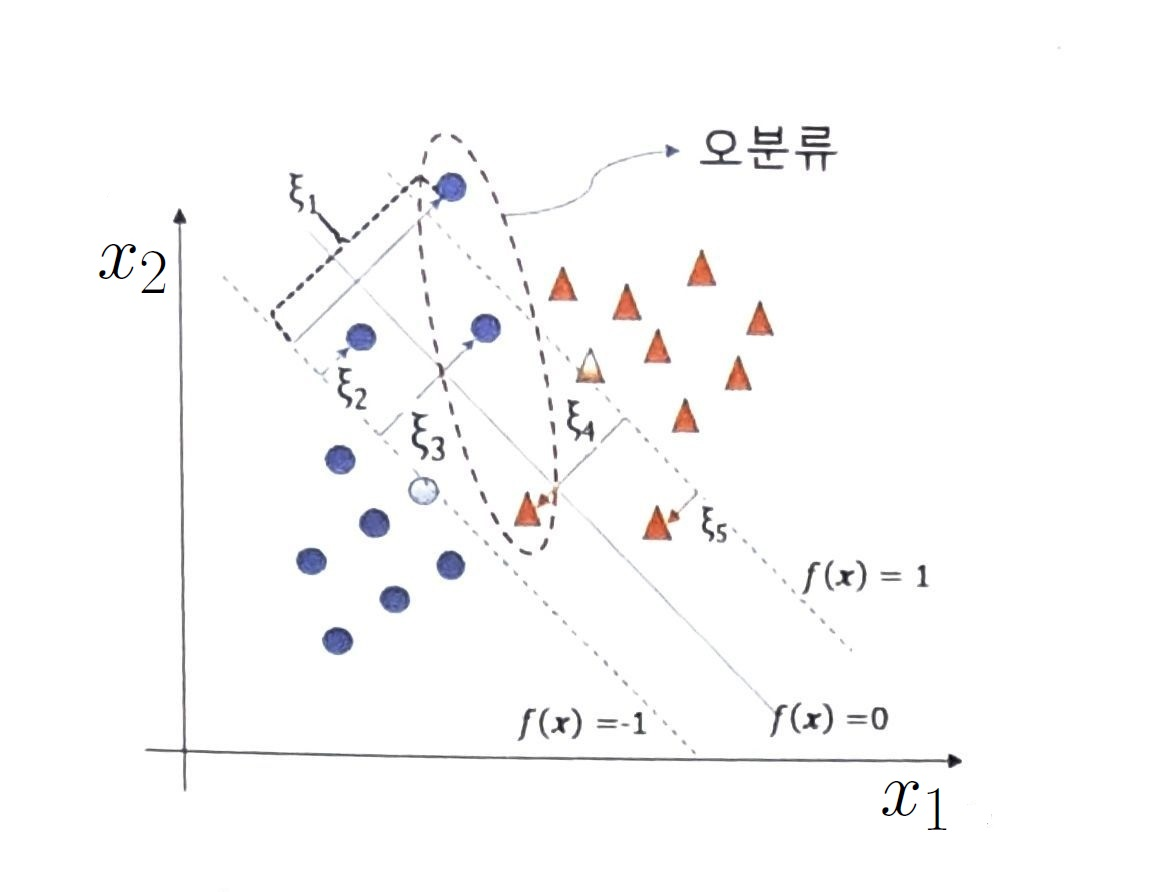

In [3]:
Image('./figs/ch07_3.jpg', width=500)

* 유연마진 분류(soft-margin classification)

  $$ y_i \left( \beta_0 +\boldsymbol{\beta}^T\mathbf{x}_i \right ) \geq 1 - \zeta_i\text{와 }\, \zeta_i \geq 0 \;\text{인 조건 하에서 } \frac{1}{2}\left \| \boldsymbol{\beta} \right \|^2 +c\sum_{i=1}^n \zeta_i \text{를 최소화하는 } \boldsymbol{\beta} $$

\begin{align*}
 l_p &= \frac{1}{2} \left \| \boldsymbol{\beta} \right \|^2 +c\sum_{i=1}^n \zeta_i -\sum_{i=1}^n \alpha_i \left[ y_i (\beta_0 +\boldsymbol{\beta}^T\mathbf{x}_i) -(1 - \zeta_i) \right] -\sum_{i=1}^n \mu_i \zeta_i\\ 
 &\Downarrow \\ 
 0 &= \sum_{i=1}^n \alpha_i y_i, \;\;
 \boldsymbol{\beta} = \sum_{i=1}^n \alpha_i y_i \mathbf{x}_i, \;\;
 \alpha_i = c-\mu_i\;\;\; \leftarrow \text{KKT - (i)}\\ 
 \\ 
\alpha_i & \left[ y_i (\beta_0 +\boldsymbol{\beta}^T\mathbf{x}_i) -(1 - \zeta_i) \right] =0, \;\; 
 y_i \left( \beta_0 +\boldsymbol{\beta}^T\mathbf{x}_i \right ) \geq 1 - \zeta_i, \;\;\mu_i \zeta_i=0, \;\; \zeta_i \geq 0 \;\;\; \leftarrow \text{KKT - (iii)}\\ \\
 &\Downarrow \\   
 l_p &= \sum_{i=1}^n \alpha_i -\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j \mathbf{x}_i^T \mathbf{x}_j \\
\end{align*}

* $\zeta=0 \,(\mu_i \neq 0)$, 즉 $\;y_i\left(\beta_0 +\boldsymbol{\beta}^T\mathbf{x}_i\right)=1$을 만족하는 써포트 백터 또는 $
y_i\left(\beta_0 +\boldsymbol{\beta}^T\mathbf{x}_i\right) > 1$을 만족하는 데이터 $\;\rightarrow\; 0 \leq \alpha_i < c$
 
  * $\zeta=0$이고 $y_i\left(\beta_0 +\boldsymbol{\beta}^T\mathbf{x}_i\right) > 1$ $\;\rightarrow\; y_i\left(\beta_0 +\boldsymbol{\beta}^T\mathbf{x}_i\right) -\left( 1 -\zeta_i \right) >0$ $\;\rightarrow \alpha=0$


* $\zeta>0 \,(\mu_i = 0)$ $\;\rightarrow\; \alpha_i = c$


$~$
그러므로  $\;y_i\left(\beta_0 +\boldsymbol{\beta}^T\mathbf{x}_i\right)=1$인 자료와 $\zeta_i > 0$인 자료가 $\boldsymbol{\beta}$ 계산에 기여함

## 7.2 커널 SVM

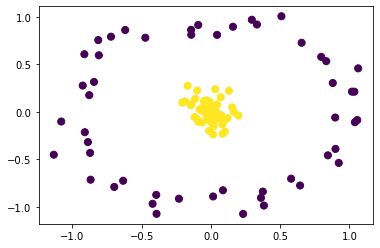

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, noise=0.1, factor=0.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.show()

In [5]:
import numpy as np
from ipywidgets.widgets import interact, fixed
from mpl_toolkits import mplot3d

r = np.exp(-(X**2).sum(axis=1))

def plot_3D(elev=30, azim=50, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev, azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

interact(plot_3D, elev=(0, 90, 10), azim=(0, 90, 10), X=fixed(X), y=fixed(y));

interactive(children=(IntSlider(value=30, description='elev', max=90, step=10), IntSlider(value=50, descriptio…

\begin{align*}
 K(\mathbf{x}_i, \mathbf{x}_j) &= \left(1+\mathbf{x}_i^T \mathbf{x}_j \right)^p,\;\;p\text{차 다항식}\\ 
 K(\mathbf{x}_i, \mathbf{x}_j) &= \exp\left(-\gamma \left(\mathbf{x}_i - \mathbf{x}_j \right)^T \left(\mathbf{x}_i - \mathbf{x}_j \right)\right), \;\;\text{방사형 기저함수}\\ 
 K(\mathbf{x}_i, \mathbf{x}_j)  &= \tanh \left(k_1 \mathbf{x}_i^T\mathbf{x}_j +k_2\right),\;\;\text{시그모이드}
\end{align*}

* 2차 다항 커널
\begin{align*}
 K(\mathbf{x}_i, \mathbf{x}_j) &= \left(1+\mathbf{x}_i^T \mathbf{x}_j \right)^2 \\
 &= (1 +x_{i,1}x_{j,1} +x_{i,2}x_{j,2})^2 \\
 &= 1 +2x_{i,1}x_{j,1} +2x_{i,2}x_{j,2} +x_{i,1}^2x_{j,1}^2 +x_{i,2}^2 x_{j,2}^2 +2x_{i,1}x_{j,1}x_{i,2}x_{j,2} \\
 &\Downarrow\\
 \mathbf{h}(\mathbf{x}_i) &= \left[
 1, \sqrt{2}x_{i,1}, \sqrt{2}x_{i,2}, x_{i,1}^2, x_{i,2}^2, \sqrt{2}x_{i,1} x_{i,2}\right]^T \\
&\Downarrow \\
 K(\mathbf{x}_i, \mathbf{x}_j) &= \mathbf{h}(\mathbf{x}_i)^T \mathbf{h}(\mathbf{x}_j)
\end{align*}

* Kernel Trick

\begin{align*}
 l_p &= \sum_{i=1}^n \alpha_i -\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j \mathbf{h}(\mathbf{x}_i)^T \mathbf{h}(\mathbf{x}_j) \\
 &\Downarrow \\ 
 l_p &= \sum_{i=1}^n \alpha_i -\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j K(\mathbf{x}_i, \mathbf{x}_j) \\
 &\Downarrow \\
 \hat{f}(\mathbf{x}) &= \hat{\beta}_0^* + \hat{\boldsymbol{\beta}}^{*T} \mathbf{h}(\mathbf{x}) \\
   &= {\hat{\beta}_0}^* + \sum_{i=1}^n {\hat{\alpha}_i}^* y_i \mathbf{h}(\mathbf{x}_i)^T \mathbf{h}(\mathbf{x}) \\
  &= {\hat{\beta}_0}^* + \sum_{i=1}^n {\hat{\alpha}_i}^* y_i K(\mathbf{x}_i, \mathbf{x})   
\end{align*}

## 7.3 sklearn을 이용한 SVM

### 선형 SVM

In [6]:
import seaborn as sns

iris = sns.load_dataset('iris')

X = iris.drop('species', axis=1)
y = iris['species']

In [7]:
from sklearn.preprocessing import LabelEncoder

classle = LabelEncoder()
y = classle.fit_transform(y.values)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [9]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

---

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9904761904761905
0.9777777777777777


In [11]:
confusion_matrix(y_test, y_test_pred)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 15]], dtype=int64)

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



* $\displaystyle\text{accuracy} = \frac{\text{TP +TN}}{\text{TP + FP + FN +TN}}$

* $\displaystyle\text{precision} = \frac{\text{TP}}{\text{TP + FP}}$

* $\displaystyle\text{recall} = \frac{\text{TP}}{\text{TP + FN}}$

* $\displaystyle \text{f1}=2 \frac{\text{precision} \times \text{recall}}{\text{precision + recall}}$

In [13]:
svm.support_

array([ 21,  43, 101,   8,  23,  33,  38,  42,  54,  58,  76,  82,  85,
         5,  10,  19,  27,  41,  59,  60,  95])

In [14]:
svm.n_support_

array([ 3, 10,  8])

### 비선형 SVM(커널 SVM)

In [15]:
ksvm = SVC(kernel='rbf', C=1.0, gamma=0.2, random_state=42)
ksvm.fit(X_train, y_train)

y_train_pred = ksvm.predict(X_train)
y_test_pred = ksvm.predict(X_test)

In [16]:
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9904761904761905
0.9555555555555556


In [17]:
confusion_matrix(y_test, y_test_pred)

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 15]], dtype=int64)

In [18]:
ksvm.support_

array([ 14,  21,  53,  61, 101,   0,   8,  23,  29,  33,  34,  38,  42,
        48,  54,  58,  76,  82,  85,   5,  10,  19,  27,  30,  32,  41,
        45,  59,  60,  67,  80,  81,  91,  95])

In [19]:
ksvm.n_support_

array([ 5, 14, 15])

### 얼굴인식(face recognition) 

In [20]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = faces.images.shape

print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 50, 37)


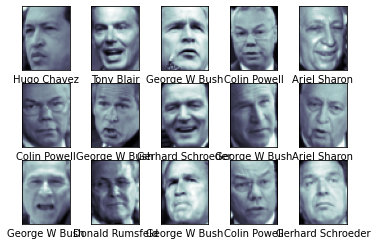

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 5)

for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i], cmap='bone')
    ax.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [22]:
X = faces.data
y = faces.target

n_features = X.shape[1]
target_names = faces.target_names
n_classes = target_names.shape[0]

print(target_names)
print(n_classes)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
7


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
from sklearn.decomposition import PCA

n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=5)
clf.fit(X_train_pca, y_train)

print(clf.best_params_)
print(clf.best_estimator_)

{'C': 1000.0, 'gamma': 0.001}
SVC(C=1000.0, class_weight='balanced', gamma=0.001)


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

y_fit = clf.predict(X_test_pca)

print(classification_report(y_test, y_fit, target_names=target_names))
print(confusion_matrix(y_test, y_fit, labels=range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.47      0.54      0.50        13
     Colin Powell       0.71      0.87      0.78        60
  Donald Rumsfeld       0.74      0.74      0.74        27
    George W Bush       0.92      0.90      0.91       146
Gerhard Schroeder       0.83      0.76      0.79        25
      Hugo Chavez       0.75      0.60      0.67        15
       Tony Blair       0.87      0.72      0.79        36

         accuracy                           0.82       322
        macro avg       0.76      0.73      0.74       322
     weighted avg       0.83      0.82      0.82       322

[[  7   1   1   3   0   0   1]
 [  3  52   3   1   0   1   0]
 [  5   1  20   0   0   1   0]
 [  0  11   2 131   1   0   1]
 [  0   2   0   2  19   1   1]
 [  0   2   0   2   1   9   1]
 [  0   4   1   3   2   0  26]]
